# High-Dimensional Data Analysis

**Course**: Computational Data Analysis (02582)  
**Case**: Case 1 - The High-Dimensional Standoff

## Overview

This notebook contains the complete analysis workflow for exploring and modeling high-dimensional data.

### Objectives

1. Load and explore the dataset
2. Perform exploratory data analysis (EDA)
3. Preprocess and clean the data
4. Apply dimensionality reduction techniques
5. Build and evaluate machine learning models
6. Visualize results and draw conclusions

## Setup

Import required libraries and configure settings.

In [10]:
# Standard library imports
import os
import sys
from pathlib import Path

project_root = Path(os.path.abspath('')).parent
sys.path.insert(0, str(project_root))

# Verify it worked
print(f"Project root added: {project_root}")
print(f"src exists: {os.path.exists(project_root / 'src')}")

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Local imports (custom modules)
from src.data_processing import load_data, preprocess_data
from src.visualization import plot_correlation_matrix, plot_pca_variance
from src.models import train_model, evaluate_model

# Configure visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

Project root added: /Users/kristinbodvarsdottir/Desktop/Github_repos/cda-case1
src exists: True


## 1. Data Loading

Load the dataset from the data directory.

In [11]:
# Define data paths
DATA_DIR = Path.cwd().parent / 'data'

# Training data
RAW_DATA_PATH_TRAIN = DATA_DIR / 'raw' / 'case1Data.csv'
PROCESSED_DATA_PATH_TRAIN = DATA_DIR / 'processed' / 'case1Data.csv'


# Target data
RAW_DATA_PATH_TARGET = DATA_DIR / 'raw' / 'case1Data_Xnew.csv'
PROCESSED_DATA_PATH_TARGET = DATA_DIR / 'processed' / 'case1Data_Xnew.csv'

# Load data
df = load_data(RAW_DATA_PATH_TRAIN)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

✓ Loaded data from case1Data.csv: (100, 101)
Dataset shape: (100, 101)

First few rows:


,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
0,375.823073,6.359019,-13.367120,-2.483750,-6.641891,11.733539,NaN,-17.085361,22.194764,16.827888,...,-10.200888,3.980048,-4.433274,-1.473723,NaN,74.0,72.0,72.0,73.0,73.0
1,266.811730,3.873664,-8.470389,-3.055012,NaN,11.420983,1.822330,-13.694100,22.738654,20.307503,...,-9.740207,NaN,-2.629314,4.816987,-12.240248,74.0,72.0,72.0,73.0,73.0
2,267.271759,5.275824,-12.070531,-1.366168,-4.819100,10.721527,-5.125992,-17.476865,NaN,15.963889,...,-14.501970,10.054005,NaN,NaN,-11.107921,73.0,72.0,75.0,74.0,74.0
3,219.951294,4.430110,-4.467975,-0.730736,-10.047104,11.498539,-2.870260,-14.033012,18.225190,10.409488,...,-11.086963,2.019726,-8.531959,3.520833,NaN,71.0,72.0,73.0,71.0,72.0
4,289.697954,3.116458,-8.518713,-6.796050,NaN,7.646285,-3.118309,-13.102567,22.801217,16.680208,...,-9.117422,6.627601,-2.805531,5.914351,-11.240573,72.0,72.0,72.0,74.0,75.0


## 2. Exploratory Data Analysis

Explore the dataset structure, distributions, and relationships.

In [13]:
# Basic statistics
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"\nData types:\n{df.dtypes.value_counts()}")
print(f"\nMissing values:\n{df.isnull().sum().sum()}")
print(f"\nTarget distribution:\n{df['y'].value_counts()}")

# Summary statistics
df.describe()

Dataset Information:
Shape: (100, 101)

Data types:
float64    101
Name: count, dtype: int64

Missing values:
1489

Target distribution:
y
375.823073    1
247.074640    1
39.702218     1
285.960719    1
58.317790     1
             ..
194.536800    1
329.135315    1
372.794751    1
203.868390    1
202.115287    1
Name: count, Length: 100, dtype: int64


,y,x_01,x_02,x_03,x_04,x_05,x_06,x_07,x_08,x_09,...,x_91,x_92,x_93,x_94,x_95,C_01,C_02,C_03,C_04,C_05
count,100.000000,87.000000,79.000000,85.000000,86.000000,88.000000,88.000000,84.000000,80.000000,87.000000,...,90.000000,81.000000,87.000000,90.000000,86.000000,78.000000,78.0,78.000000,78.000000,78.000000
mean,211.521238,2.794472,-10.428729,-4.056112,-6.029949,9.815258,-4.057966,-13.534972,22.439790,14.002414,...,-12.617194,5.967559,-4.363874,3.350329,-10.545234,73.000000,72.0,72.794872,73.333333,72.846154
std,72.476499,2.902720,2.553962,2.904539,3.132403,2.610209,3.295600,2.817909,2.797903,3.190918,...,2.669706,2.686854,2.775601,2.927385,2.850058,1.376991,0.0,1.361426,1.401916,1.358732
min,39.702218,-4.074607,-15.316637,-10.840247,-13.320232,2.099694,-10.965169,-19.564483,14.281130,5.574270,...,-19.259988,-1.428501,-12.460672,-2.406875,-16.268568,71.000000,72.0,71.000000,71.000000,71.000000
25%,163.757582,0.508729,-12.469860,-5.994591,-8.586691,8.170811,-6.215558,-15.442493,20.467655,12.132821,...,-14.560693,4.192116,-6.257376,1.631049,-12.716112,72.000000,72.0,72.000000,72.000000,72.000000
50%,215.257947,2.654725,-10.488042,-3.631874,-5.793856,9.984196,-3.771067,-13.568780,22.435510,13.670553,...,-12.453503,5.779682,-4.097142,3.183367,-10.462356,73.000000,72.0,73.000000,74.000000,73.000000
75%,260.907758,4.911518,-8.496459,-2.121282,-3.870936,11.410208,-1.972570,-11.639240,24.276527,15.980201,...,-10.727816,7.501444,-2.792433,4.863970,-8.431565,74.000000,72.0,74.000000,74.000000,74.000000
max,375.823073,8.737899,-4.419087,1.840223,0.839114,18.339822,4.062024,-5.976463,28.777232,21.531983,...,-6.804967,12.575124,1.853439,9.991009,-4.520711,75.000000,72.0,75.000000,75.000000,75.000000


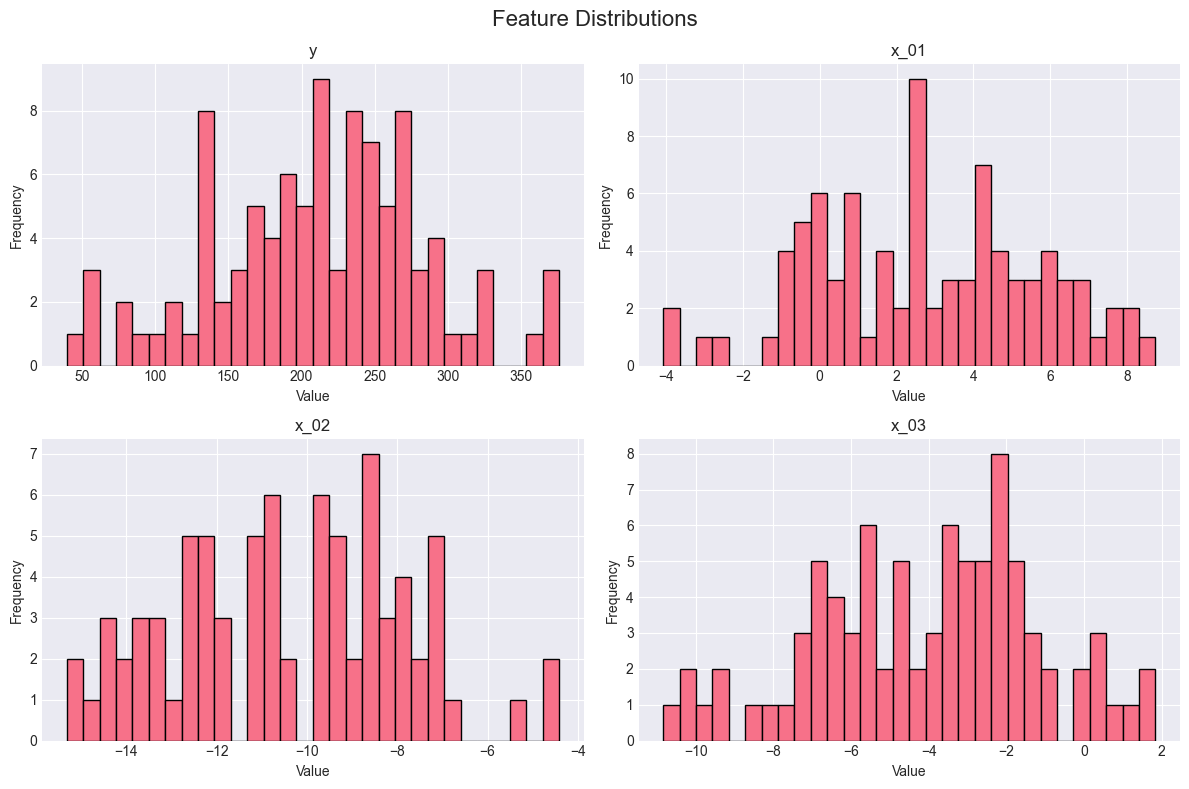

In [14]:
# Visualize feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Feature Distributions', fontsize=16)

for idx, ax in enumerate(axes.flat):
    if idx < len(df.columns) - 1:
        df[df.columns[idx]].hist(bins=30, ax=ax, edgecolor='black')
        ax.set_title(f'{df.columns[idx]}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Handle missing values

Handle the missing values in the data

In [ ]:
# TODO:

## 4. Factor handling

Handle the categorical variables

In [ ]:
# TODO:

## 5. Data Preprocessing

Clean and prepare the data for modeling.

In [ ]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print("✓ Data preprocessing complete")

## 6. Dimensionality Reduction

Apply PCA to reduce dimensionality and visualize the results.

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.2%}")

# Plot variance explained
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Components')
plt.grid(True)
plt.show()

## 7. Model Training

Train machine learning models on the processed data.

In [ ]:
# Train Random Forest classifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_scaled, y_train)
print("✓ Model training complete")

## 8. Model Evaluation

Evaluate the model performance on the test set.

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 7. Conclusions

### Key Findings

1. **Data characteristics**: [Describe the main characteristics of your data]
2. **Model performance**: [Summarize model performance metrics]
3. **Important features**: [Discuss the most important features]
4. **Recommendations**: [Provide recommendations based on findings]

### Next Steps

- Try additional feature engineering
- Experiment with different models
- Perform hyperparameter tuning
- Collect more data if needed

---

**End of Analysis**